In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")

In [2]:
X, y = dataset["data"], dataset["target"]

In [3]:
X=X/255

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [5]:
Y_new

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
Y_new.shape

(10, 70000)

In [7]:
Y_new[:,100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [8]:
y[0,100]

'5'

In [9]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

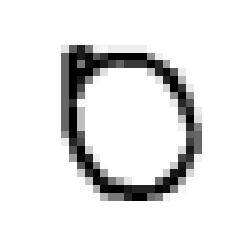

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [11]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [12]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  7.9528033305274635
Epoch 100 cost:  0.7253531161133009
Epoch 200 cost:  0.5545762456127782
Epoch 300 cost:  0.48124568936955436
Epoch 400 cost:  0.4366908364425998
Epoch 500 cost:  0.40530714289859526
Epoch 600 cost:  0.38130119366268816
Epoch 700 cost:  0.36198392439269134
Epoch 800 cost:  0.3459027980543153
Epoch 900 cost:  0.33217971375629674
Epoch 1000 cost:  0.3202406192143076
Epoch 1100 cost:  0.3096847165468209
Epoch 1200 cost:  0.30022410327320664
Epoch 1300 cost:  0.29165037807658045
Epoch 1400 cost:  0.28381269255463043
Epoch 1500 cost:  0.2766026054738862
Epoch 1600 cost:  0.26993941112438585
Epoch 1700 cost:  0.26375601736388643
Epoch 1800 cost:  0.25799231906081854
Epoch 1900 cost:  0.25259601200220344
Final cost: 0.24757301111850818


In [13]:
from sklearn.metrics import classification_report
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 939    0    9    4    1   15   10    2    7    4]
 [   0 1111    4    0    1    2    2   13    6    7]
 [   8    3  925   21    5    7    5   24   15    2]
 [   5    4   19  918    0   45    2    5   20   10]
 [   3    1   14    2  904    5   19   10   12   46]
 [  10    3    6   22    4  774   18    2   17    8]
 [   8    4   13    1   15   10  892    0    8    0]
 [   4    5   10   14    4    3    3  947   11   21]
 [   3    4   27   20    5   23    6    6  865   16]
 [   0    0    5    8   43    8    1   19   13  895]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       991
           1       0.98      0.97      0.97      1146
           2       0.90      0.91      0.90      1015
           3       0.91      0.89      0.90      1028
           4       0.92      0.89      0.90      1016
           5       0.87      0.90      0.88       864
           6       0.93      0.94      0.93       951
           7       0.92      0.93   